In [2]:
#Import dataset and libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.ticker import MaxNLocator
import tensorflow as tf
#import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score,roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ten

In [3]:
df = pd.read_csv('cardio_train.csv') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio    70000 non-null object
dtypes: object(1)
memory usage: 547.0+ KB


In [5]:
df.shape

(70000, 1)

In [6]:
#Only 1 column does not seem accurate, setting a delimiter
df = pd.read_csv('cardio_train.csv', delimiter=';')
df.shape


(70000, 13)

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# dropping unnecessary column
df.drop('id',axis=1,inplace=True)

In [9]:
df.isnull().values.any()

False

In [10]:
df.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [11]:
#Change age to show in years instead of days
df['years'] = (df['age'] / 365).round().astype('int')

In [12]:
#convert weight from kg to lbs
df['weight']*=2.20462

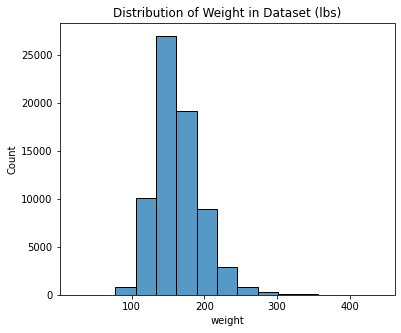

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df, x='weight', bins=15)
ax.set_title('Distribution of Weight in Dataset (lbs)');

Clearly there are outliers in weight, let's check for more outliers and then redo this distribution.

## Checking for Outliers

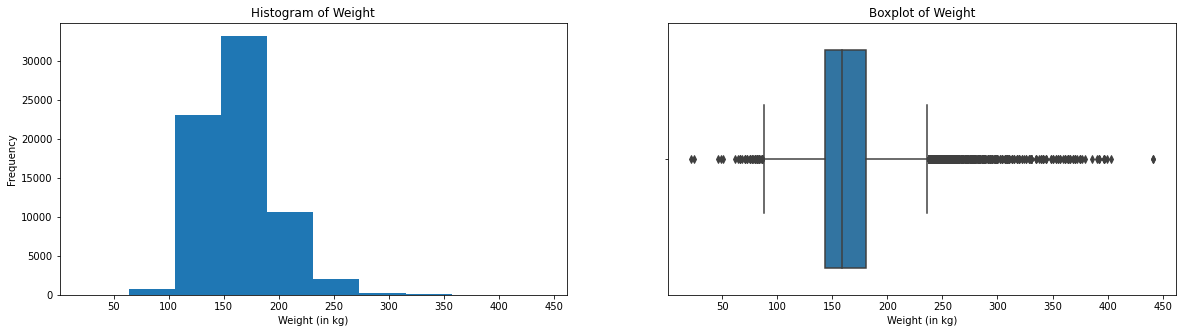

In [14]:
fig_3 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_3.add_subplot(121)
chart_2 = fig_3.add_subplot(122)

chart_1.hist(df["weight"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Weight')
chart_1.set_xlabel('Weight (in kg)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="weight", data=df, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Weight')
chart_2.set_xlabel('Weight (in kg)')


plt.show()

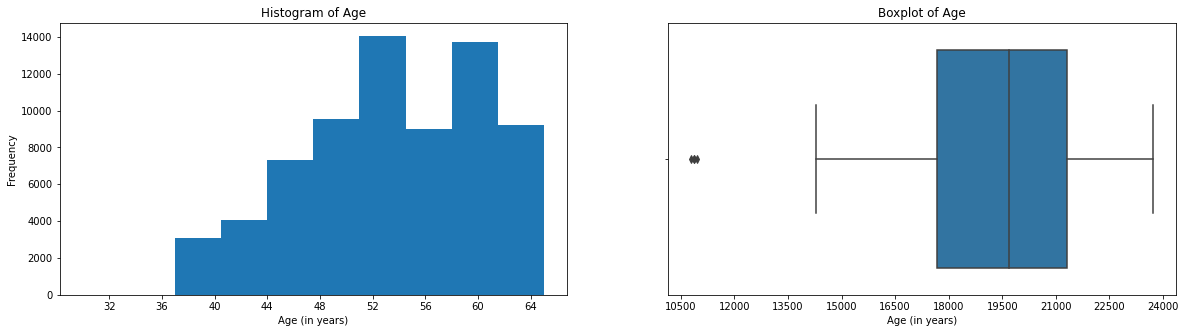

In [15]:
fig_1 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.hist(df["years"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Age')
chart_1.set_xlabel('Age (in years)')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="age", data=df, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Age')
chart_2.set_xlabel('Age (in years)')


plt.show()

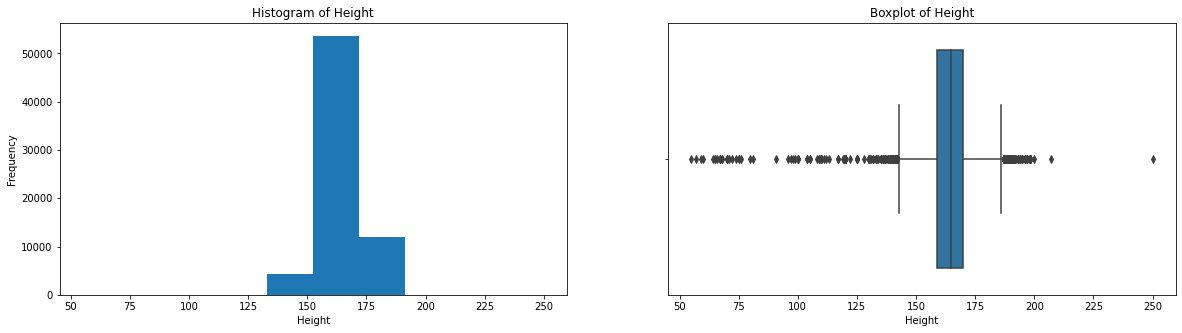

In [16]:
fig_1 = plt.figure(1, figsize=(20, 5))

chart_1 = fig_1.add_subplot(121)
chart_2 = fig_1.add_subplot(122)

chart_1.hist(df["height"])
chart_1.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_1.set_title('Histogram of Height')
chart_1.set_xlabel('Height')
chart_1.set_ylabel('Frequency')

sns.boxplot(x="height", data=df, ax=chart_2)
chart_2.xaxis.set_major_locator(MaxNLocator(integer=True))
chart_2.set_title('Boxplot of Height')
chart_2.set_xlabel('Height')


plt.show()

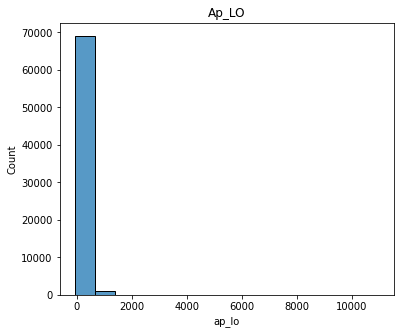

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df, x='ap_lo', bins=15)
ax.set_title('Ap_LO');

ap_hi and ap_lo need to be worked on

In [18]:
df.ap_hi[df.ap_hi > 100]

0        110
1        140
2        130
3        150
5        120
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 66069, dtype: int64

In [19]:
#ap_lo is diastolic, the bottom number; ap_hi is systolic, the upper number
#ap_lo should not be higher than ap_hi 
df[df['ap_lo'] > df['ap_hi']].shape[0]

1234

In [20]:
df.rename(columns={'ap_hi':'systolic'}, inplace=True)

In [21]:
df.rename(columns={'ap_lo':'diastolic'}, inplace=True)

In [22]:
df.head(3)

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,years
0,18393,2,168,136.68644,110,80,1,1,0,0,1,0,50
1,20228,1,156,187.39270,140,90,3,1,0,0,1,1,55
2,18857,1,165,141.09568,130,70,3,1,0,0,0,1,52


In [23]:
df[(df['height'] < df['height'].quantile(0.025))].shape

(1537, 13)

In [24]:
df[(df['height'] > df['height'].quantile(0.975))].shape

(1439, 13)

In [25]:
df[(df['systolic']>df['systolic'].quantile(0.975))].shape

(1114, 13)

* Remove outliers in height, weight that fall below 2.5% and above 97.5%
* Remove outliers, where diastolic pressure is higher than systolic, which is incorrect

In [26]:
# height, weight dropping the outliers #why did i do this-- dropped outliers 
df.drop(df[(df['height'] > df['height'].quantile(0.975)) 
           | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) 
           | (df['weight'] < df['weight'].quantile(0.025))].index, inplace=True)

In [27]:
# blood pressure
df.drop(df[(df['systolic'] > df['systolic'].quantile(0.975)) 
           | (df['systolic'] < df['diastolic'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['diastolic'] > df['diastolic'].quantile(0.975)) 
           | (df['diastolic'] < df['diastolic'].quantile(0.025))].index,inplace=True)

## EDA

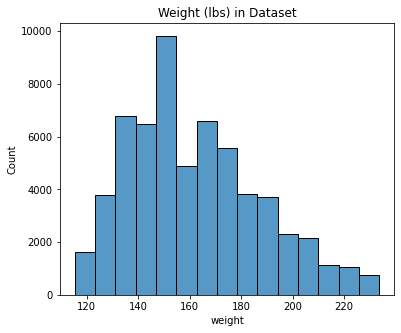

In [28]:
#Checking weight distribution again
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df, x='weight', bins=15)
ax.set_title('Weight (lbs) in Dataset');

This distribution seems more accurate representation of weight.

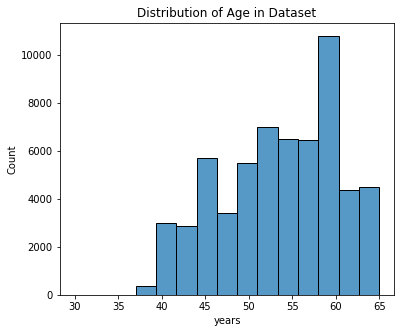

In [29]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df, x='years', bins=15)
ax.set_title('Distribution of Age in Dataset');

Age ranges from mid-30's to mid-60's

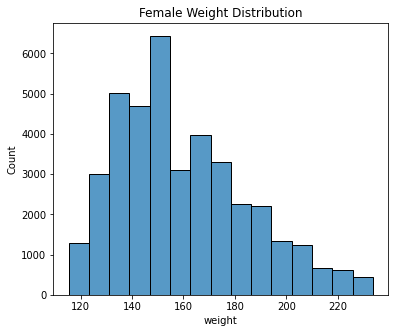

In [30]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df[df.gender==1], x='weight', bins=15)
ax.set_title('Female Weight Distribution');

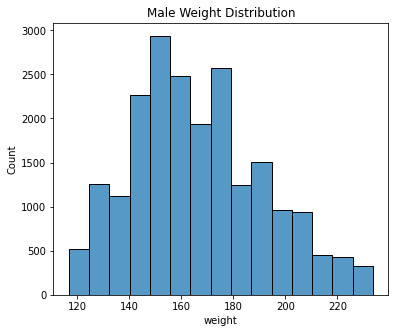

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df[df.gender==2], x='weight', bins=15)
ax.set_title('Male Weight Distribution');

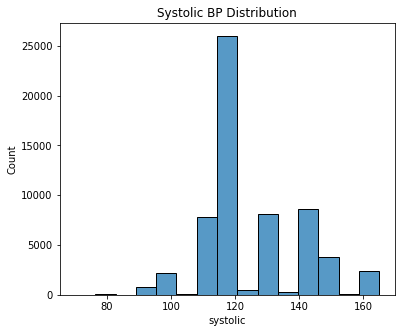

In [32]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df, x='systolic', bins=15)
ax.set_title('Systolic BP Distribution');

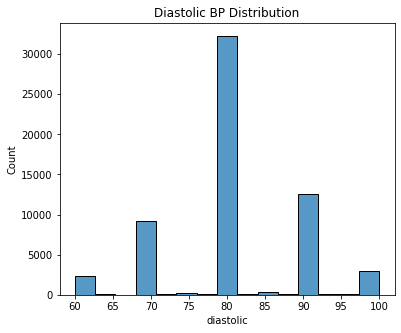

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df, x='diastolic', bins=15)
ax.set_title('Diastolic BP Distribution');

Mostly 120/80 so healthy BP, which is healthy

In [34]:
# Creating BMI index
df['bmi'] = df['weight']/((df['height']/100)**2)

In [35]:
df.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
0,18393,2,168,136.68644,110,80,1,1,0,0,1,0,50,48.429152
1,20228,1,156,187.39270,140,90,3,1,0,0,1,1,55,77.002260
2,18857,1,165,141.09568,130,70,3,1,0,0,0,1,52,51.825778
3,17623,2,169,180.77884,150,100,1,1,0,0,1,1,48,63.295697
4,17474,1,156,123.45872,100,60,1,1,0,0,0,0,48,50.730901


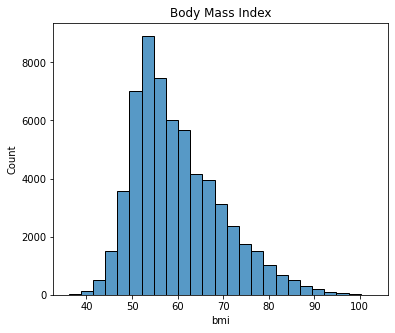

In [36]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.histplot(data=df, x='bmi', bins=25)
ax.set_title('Body Mass Index');

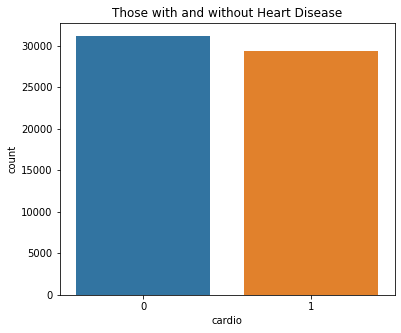

In [37]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.countplot(data=df, x='cardio')
ax.set_title('Those with and without Heart Disease');


 Balanced number of subjects with and without cardiovascular disease (CVD)

<AxesSubplot:>

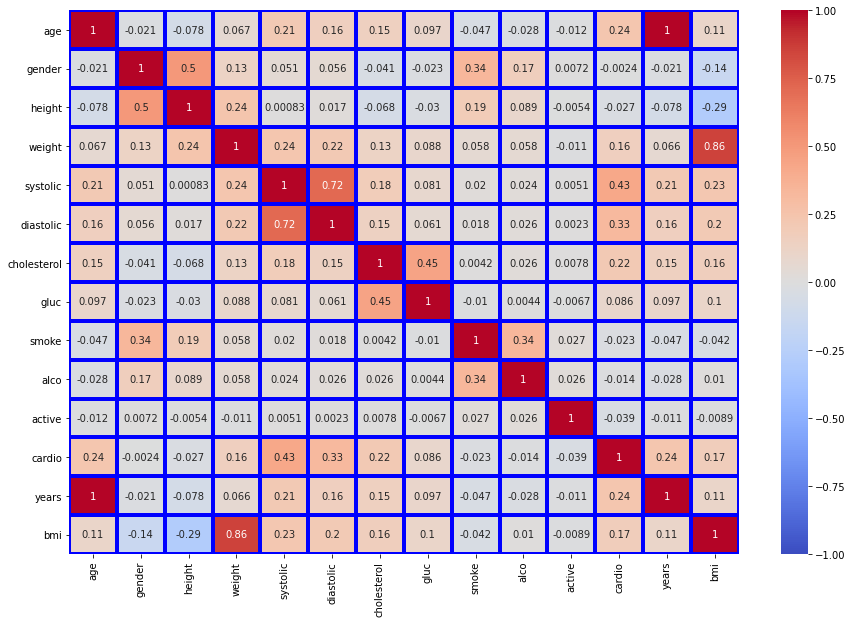

In [38]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='blue')


Systolic has highest correlation with cardiovascular disease at 0.43

In [39]:
y = df['cardio']
X = df.drop(['cardio','age'],axis=1)

In [40]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [41]:
# feature scaling
# scaled only continuous values
ss = StandardScaler()
X_train[['years','height','weight','systolic','diastolic','bmi']] = ss.fit_transform(X_train[['years','height','weight','systolic','diastolic','bmi']])
X_test[['years','height','weight','systolic','diastolic','bmi']] = ss.fit_transform(X_test[['years','height','weight','systolic','diastolic','bmi']])

In [41]:
X_train.head()

,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,years,bmi
30325,2,1.528749,1.955493,-0.370978,-0.094571,1,1,1,0,1,-1.671631,0.950347
10121,1,0.649676,-0.390957,-0.370978,-0.094571,1,3,0,0,1,0.696774,-0.694966
63206,1,0.063627,0.304287,0.325840,-2.456143,1,1,0,0,0,-1.967682,0.248992
28518,1,-1.987544,-1.520729,-0.370978,-0.212649,1,1,0,0,1,0.992825,-0.603064
7347,1,-0.082885,0.738815,1.022659,1.086216,1,1,0,0,1,1.584926,0.753697


Best Penalty: l2
Best C: 1


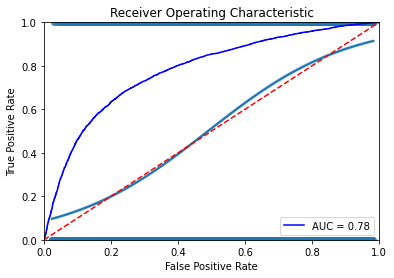

Accuracy 0.7193735958768336
AUC_ROC 0.7228359460765253
Recall 0.7458786936236392
Recall 0.7458786936236392
Precision 0.6473208260224051


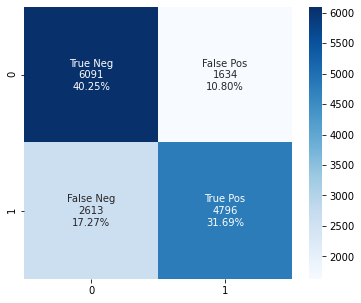

In [42]:
# logistic regression

logistic = LogisticRegression(random_state=12345)
hyperparameters = {'penalty':('l1','l2'),'C':[1,3]}
clf = GridSearchCV(logistic, hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train, y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

y_pred = best_model.predict(X_test)
y_hat_proba = best_model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)
#---------Logistic Regression Curve----------#
log_curve = sns.regplot(x=y_hat_proba, y=y_test, data=None, logistic=True)
plt.title('Probability Curve')

#------------ROC Curve-----------#
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(y_test,y_pred)

#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()


print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Best Citerion: entropy
Best Num Split: 2
Best Depth: 7
[[6016 1709]
 [2506 4903]]
Accuracy 0.7214880401744417
AUC_ROC 0.723734061926904
Recall 0.7415305505142166
Precision 0.6617627210149818


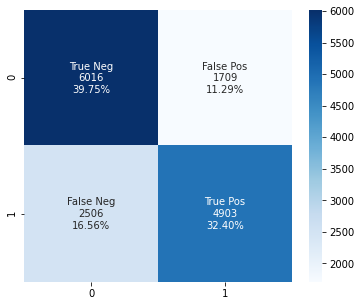

In [43]:
# # decision tree grid search
dt = DecisionTreeClassifier(random_state=12345)
hyperparameters = {'criterion':('entropy','gini'),'min_samples_split':range(2,10,2),'max_depth':range(1,10,2)}
clf = GridSearchCV(dt, hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train, y_train)

print('Best Citerion:', best_model.best_estimator_.get_params()['criterion'])
print('Best Num Split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best Depth:', best_model.best_estimator_.get_params()['max_depth'])

y_pred = best_model.predict(X_test)
y_hat_proba = best_model.predict_proba(X_test)[:,1]

scores = cross_val_score(best_model,X_test,y_pred, cv=5)
cm = confusion_matrix(y_test,y_pred)

#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()




print(cm)
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

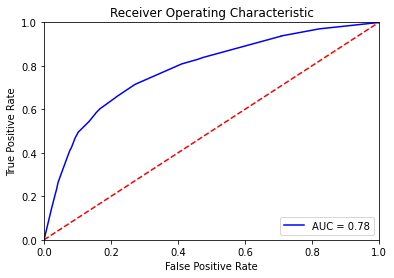

Accuracy 0.7202325888727369
AUC_ROC 0.7311748216924057
Recall 0.7765197700748998
Precision 0.6017006343636119


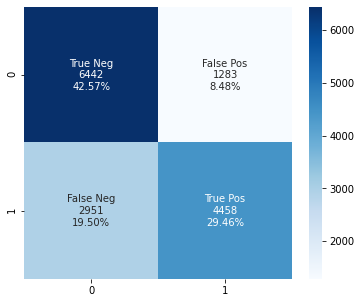

In [44]:
# we tuned the parameters for the model, now we can manully set them
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=2,max_depth=5,random_state=12345)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_hat_proba = dt.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
scores = cross_val_score(dt,X_test,y_pred, cv=5)
cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()



print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))


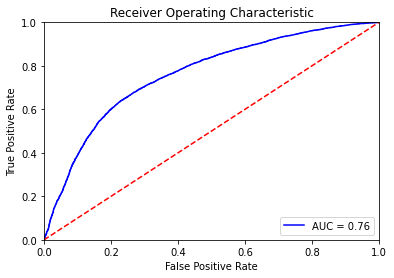

Precision 0.6170873262248616
Accuracy 0.7041760274877759
AUC_ROC 0.7090084084242732
Recall 0.7359948486799742
Precision 0.6170873262248616


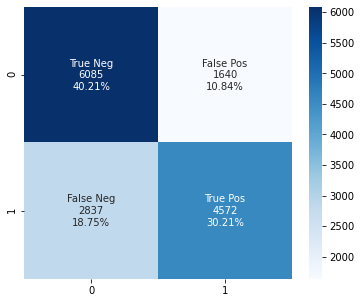

In [45]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
y_hat_proba = nb.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(y_test,y_pred)

#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()



print('Precision',precision_score(y_pred,y_test))
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Best Penalty: l1
Best C: 3
Accuracy 0.7197700541826352
AUC_ROC 0.7242231243705037
0.9984141405473672
Recall 0.7510301109350238
Precision 0.6396274800917803


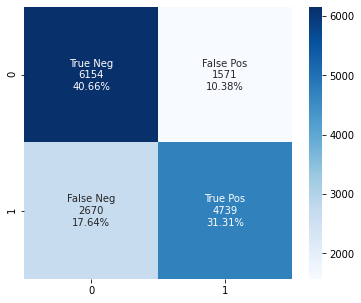

In [46]:
# SVM 
svm = LinearSVC(dual=False,random_state=12345)
hyperparameters = {'penalty':('l1','l2'),
                   'C':[1,3]}

clf = GridSearchCV(svm, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

y_pred = best_model.predict(X_test)
# y_hat_proba = best_model.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()

scores = cross_val_score(best_model,X_test,y_pred, cv= 5)

print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(scores.mean())
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Precision 0.6394925091105412
Accuracy 0.7196379014140346
AUC_ROC 0.724087221423204
Recall 0.7508716323296355
Precision 0.6394925091105412


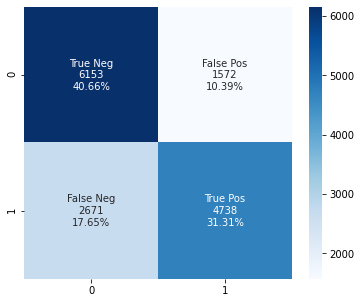

In [47]:
# SVM 
svm = LinearSVC(penalty='l2',C=1,random_state=12345)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()



print('Precision',precision_score(y_pred,y_test))
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Best Loss: log
Best penalty: l1
Best learning_rate: optimal
Accuracy 0.7191092903396327
AUC_ROC 0.7207904241585201
0.9990088760529545
Recall 0.7355310262529833
Precision 0.6655419084896748


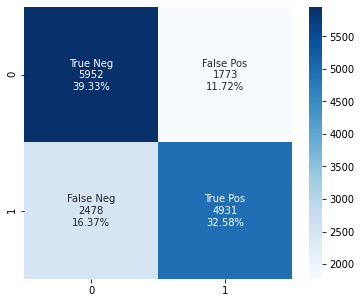

In [48]:
# # SVM - SGDClassifier 
svm = SGDClassifier(eta0=1,random_state=12345)
hyperparameters = {'loss':('log','perceptron'),
                    'penalty':('l1','l2','elasticnet'),
                    'learning_rate':('constant','optimal','invscaling','adaptive')}
clf = GridSearchCV(svm, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)

print('Best Loss:', best_model.best_estimator_.get_params()['loss'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

y_pred = best_model.predict(X_test)
y_hat_proba = best_model.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test,y_pred)
scores = cross_val_score(best_model,X_test,y_pred, cv= 5)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()



print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(scores.mean())
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Best K_value: 9
Best p: 2
Accuracy 0.7040438747191754
AUC_ROC 0.7044531409215806
0.8883311705992181
Recall 0.7097651775486827
Precision 0.6690511540018896


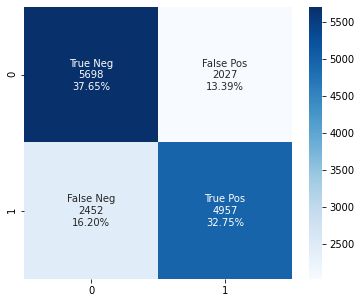

In [49]:
knn = KNeighborsClassifier(metric='minkowski',weights='uniform')
hyperparameters = {'n_neighbors':range(3,10,1), 'p':[1,2]}
clf = GridSearchCV(knn, hyperparameters, cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train, y_train)

print('Best K_value:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model.best_estimator_.get_params()['p'])

y_pred = best_model.predict(X_test)
y_hat_proba = best_model.predict_proba(X_test)[:,1]

scores = cross_val_score(best_model,X_test,y_pred, cv= 5)
cm = confusion_matrix(y_test,y_pred)

#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()

print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(scores.mean())
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

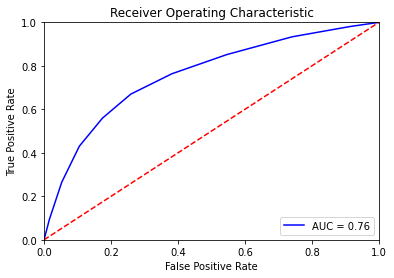

Precision 0.6701309218518019
Accuracy 0.7062243954010836
AUC_ROC 0.7066961181320978
Recall 0.712645327974738
Precision 0.6701309218518019


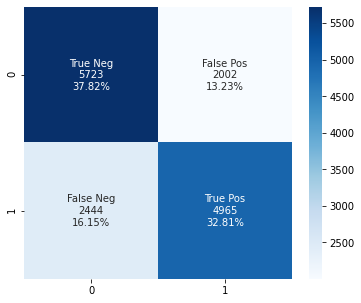

In [50]:
# KNN
knn = KNeighborsClassifier(n_neighbors=9,metric='minkowski',weights='uniform',p=1)
knn.fit(X_train, y_train)
y_pred =  knn.predict(X_test)

y_hat_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()




print('Precision',precision_score(y_pred,y_test))
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Best Citerion: gini
Best n_estimator: 18
Best min_sample_splits: 2
Best max_depth: 9
Accuracy 0.7243293246993524
AUC_ROC 0.7289744151791875
[[6192 1533]
 [2639 4770]]
Recall 0.7567824845311756
Precision 0.6438115805101903


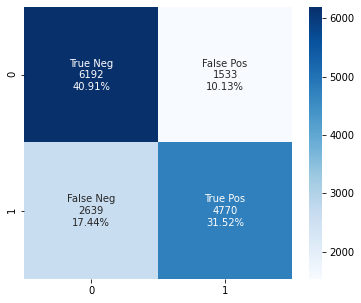

In [51]:
# # random forest
rf = RandomForestClassifier()
hyperparameters = {'n_estimators':range(10,20,2), 
                    'criterion':('entropy','gini'),
                    'max_depth':range(1,10,2),
                    'min_samples_split':range(2,10,1)}

clf = GridSearchCV(rf, hyperparameters, cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train, y_train)

print('Best Citerion:', best_model.best_estimator_.get_params()['criterion'])
print('Best n_estimator:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best min_sample_splits:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

y_pred = best_model.predict(X_test)
y_hat_proba = best_model.predict_proba(X_test)[:,1]

scores = cross_val_score(best_model,X_test,y_pred, cv= 5)
cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()





print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(cm)
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Best Criterion: entropy
Best n_estimator: 16
Best min_sample_splits: 5
Best max_depth: 9
Accuracy 0.7213558874058411
AUC_ROC 0.7269327898326952
Recall 0.7576687116564417
Precision 0.6334188149547847


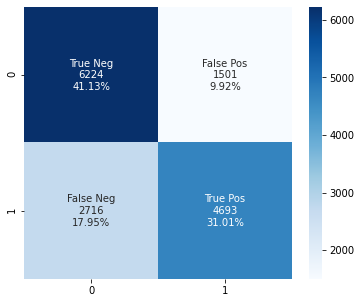

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier()
hyperparameters = {'n_estimators':range(10,20,2), 
                    'criterion':('entropy','gini'),
                    'max_depth':range(1,10,2),
                    'min_samples_split':range(2,10,1)}

clf = GridSearchCV(extra_clf, hyperparameters, cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train, y_train)

print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best n_estimator:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best min_sample_splits:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

y_pred = best_model.predict(X_test)

cross_val_score(best_model,X_test,y_pred, cv= 5)
cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()

print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Precision 0.6205965717370765
Accuracy 0.7175895335007269
AUC_ROC 0.7244001717866956
Recall 0.7586206896551724
Precision 0.6205965717370765


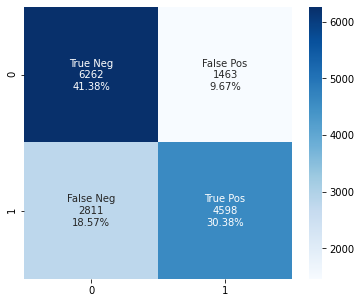

In [53]:
extra_clf = ExtraTreesClassifier(n_estimators=18,criterion='entropy',min_samples_split=9,
                                 max_depth=9,random_state=12345)
extra_clf.fit(X_train,y_train)
y_pred =  extra_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()


print('Precision',precision_score(y_pred,y_test))
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Precision 0.6285598596301795
Accuracy 0.7199022069512356
AUC_ROC 0.7259286758145626
Recall 0.7579752604166666
Precision 0.6285598596301795


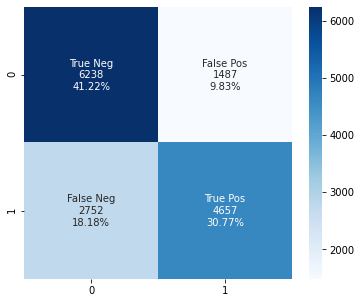

In [54]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(learning_rate=0.99,n_estimators=50)
ada_boost.fit(X_train, y_train)

y_pred = ada_boost.predict(X_test)
cross_val_score(best_model,X_test,y_pred, cv= 5)
cm = confusion_matrix(y_test,y_pred)
#---------Confusion Matrix----------#
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
fig.tight_layout()



print('Precision',precision_score(y_pred,y_test))
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense 

In [44]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [45]:
# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


In [61]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape = (13,) ))
#model.add(Dropout(0.2))
model.add(Dense(48, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_val, y_val))


Train on 38742 samples, validate on 9686 samples
Epoch 1/25
38742/38742 [==============================] - 23s 583us/step - loss: 0.6928 - acc: 0.5160 - val_loss: 0.6931 - val_acc: 0.5086
Epoch 2/25
38742/38742 [==============================] - 21s 541us/step - loss: 0.6925 - acc: 0.5182 - val_loss: 0.6931 - val_acc: 0.5086
Epoch 3/25
38742/38742 [==============================] - 20s 519us/step - loss: 0.6925 - acc: 0.5182 - val_loss: 0.6930 - val_acc: 0.5086
Epoch 4/25
38742/38742 [==============================] - 14s 370us/step - loss: 0.6925 - acc: 0.5182 - val_loss: 0.6933 - val_acc: 0.5086
Epoch 5/25
38742/38742 [==============================] - 17s 434us/step - loss: 0.6925 - acc: 0.5182 - val_loss: 0.6931 - val_acc: 0.5086
Epoch 6/25
38742/38742 [==============================] - 16s 417us/step - loss: 0.6925 - acc: 0.5182 - val_loss: 0.6931 - val_acc: 0.5086
Epoch 7/25
38742/38742 [==============================] - 11s 288us/step - loss: 0.6925 - acc: 0.5182 - val_loss: 0.6

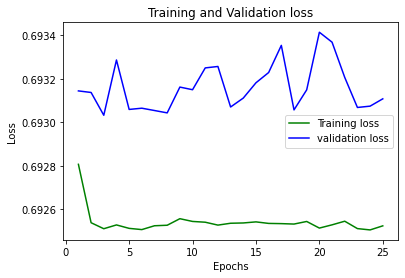

In [63]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(history.history['loss'])+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [155]:
history.history

{'val_loss': [8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846,
  8.173961887510846],
 'val_acc': [0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811364190272,
  0.4872811

From viewing this, the numbers are similar, in each catagory or loss and accuracy. This explains the graph and also may indicate that more than just a few epochs need to be run.  

In [1]:
#add dropouts and regularize, do standardization